In [1]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# 데이터 로드 (CSV 파일 경로를 설정하세요)
data = pd.read_csv('태양광_일사량_훈련.csv')

# 독립 변수 (DHI, DNI, WS, RH, T)와 종속 변수 (TARGET)를 설정
X = data[['DHI', 'DNI', 'WS', 'RH', 'T']]  # 독립 변수
y = data['TARGET']  # 종속 변수 (발전량)

# 데이터를 훈련/테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 신경망 모델 (MLPRegressor) 생성
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# 모델 학습
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)
print(f'Model R^2 score: {model.score(X_test_scaled, y_test)}')

# SHAP 분석을 위한 배경 데이터 샘플링 (예: 100개의 샘플 사용)
background_sample = shap.sample(X_train_scaled, 100)

# 또는 KMeans 클러스터링을 사용해 배경 데이터 요약 (예: 10개의 클러스터 사용)
# background_sample = shap.kmeans(X_train_scaled, 10)

# SHAP 분석을 위한 Explainer 생성
explainer = shap.KernelExplainer(model.predict, background_sample)

# 테스트 세트에 대해 SHAP 값을 계산 (최대 100개의 샘플 사용)
shap_values = explainer.shap_values(X_test_scaled[:100])

# SHAP 값 시각화 (각 변수의 기여도를 설명)
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=['DHI', 'DNI', 'WS', 'RH', 'T'])

# SHAP 값에 따른 개별 변수의 영향 시각화 (개별 특징에 대한 설명)
shap.dependence_plot(0, shap_values, X_test_scaled[:100], feature_names=['DHI', 'DNI', 'WS', 'RH', 'T'])


C:\Users\tlgud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '태양광_일사량_훈련.csv'

Model R^2 score: 0.9981369796112532
Model RMSE: 1.125735580463539


100%|██████████| 100/100 [00:03<00:00, 31.75it/s]


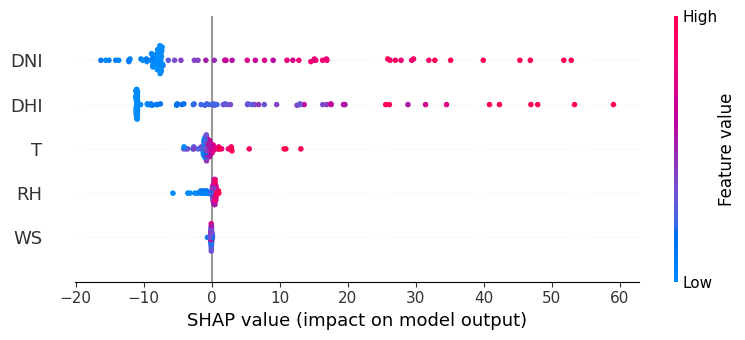

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 로드 (CSV 파일 경로를 설정하세요)
data = pd.read_csv('태양광_일사량_훈련.csv')

# 독립 변수 (DHI, DNI, WS, RH, T)와 종속 변수 (TARGET)를 설정
X = data[['DHI', 'DNI', 'WS', 'RH', 'T']]  # 독립 변수
y = data['TARGET']  # 종속 변수 (발전량)

# 데이터를 훈련/테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화 (StandardScaler 사용)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 신경망 모델 (MLPRegressor) 생성
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# 모델 학습
model.fit(X_train_scaled, y_train)

# 모델 평가
y_pred = model.predict(X_test_scaled)

# R² 값 출력
r2_score = model.score(X_test_scaled, y_test)
print(f'Model R^2 score: {r2_score}')

# RMSE 계산 및 출력
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Model RMSE: {rmse}')

# SHAP 분석을 위한 배경 데이터 샘플링 (예: 100개의 샘플 사용)
background_sample = shap.sample(X_train_scaled, 100)

# SHAP 분석을 위한 Explainer 생성
explainer = shap.KernelExplainer(model.predict, background_sample)

# 테스트 세트에 대해 SHAP 값을 계산 (최대 100개의 샘플 사용)
shap_values = explainer.shap_values(X_test_scaled[:100])

# SHAP 값 시각화 (각 변수의 기여도를 설명)
shap.summary_plot(shap_values, X_test_scaled[:100], feature_names=['DHI', 'DNI', 'WS', 'RH', 'T'])


100%|██████████| 100/100 [00:02<00:00, 34.16it/s]


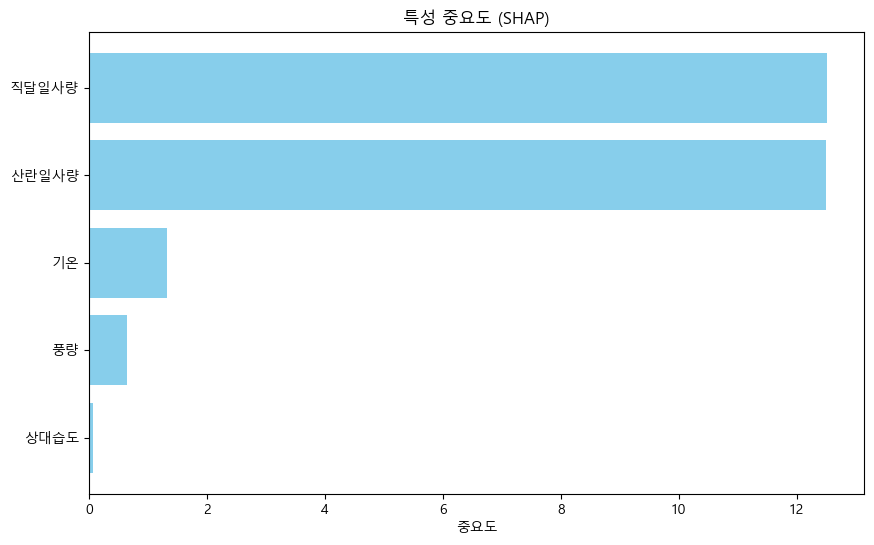

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# SHAP 값 계산 (이미 구했다고 가정)
# shap_values는 모델에 대해 이미 구해진 SHAP 값 배열이라고 가정합니다.
shap_values = explainer.shap_values(X_test_scaled[:100])

# SHAP 값의 절대값을 취한 뒤 평균 계산
feature_importance = np.mean(np.abs(shap_values), axis=0)

# feature importance를 pandas DataFrame으로 변환
feature_names = ['산란일사량', '직달일사량', '상대습도', '풍량', '기온']
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 결과 출력


# 중요도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('중요도')
plt.title('특성 중요도 (SHAP)')
plt.gca().invert_yaxis()  # 중요도가 높은 특성이 위로 오도록 반전
plt.show()

